# 제주도 호텔에 관하여

1->호텔 지도 시각화

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
plt.rcParams['font.family'] = 'BM YEONSUNG'
#plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams['axes.unicode_minus'] = False

In [128]:
Data=pd.read_excel("C:/Users/SAMSUNG/Desktop/세미_프로젝트2/정훈/수정데이터/숙박(최종).xlsx")
data=pd.DataFrame(Data)
data.drop(columns=data.columns[:2],inplace=True)

### 평점 별 분석

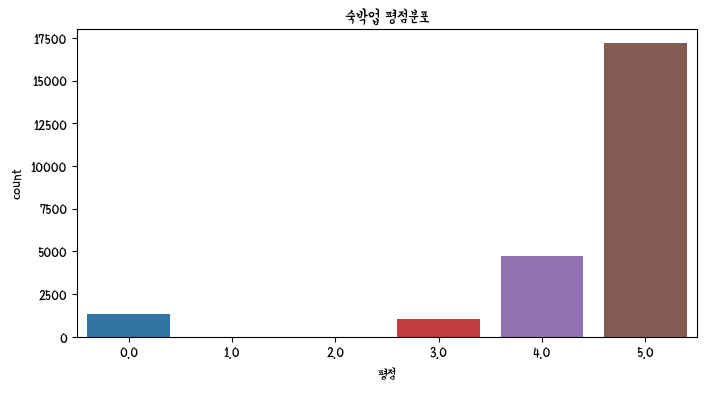

In [124]:
data["평점"].isna().sum()
data["평점"].fillna(0,inplace=True)
data["평점"].value_counts()
plt.figure()
plt.title("숙박업 평점분포")
sb.countplot(data=data,
             x="평점")
plt.xlabel("평점")
plt.show()

### 행정구역별 분포

In [4]:
행정구역 = {'구좌':'구좌',
  '조천':'조천', 
  '화북': '동제주','봉개':'동제주', '회천':'동제주','용강':'동제주',
  '오라':'중제주','아라':'중제주','오등':'중제주','화북':'중제주','이도':'중제주','건입':'중제주','삼도':'중제주','용담':'중제주','일도':'중제주', 
  '도두':'서제주','이호':'서제주','외도':'서제주','내도':'서제주','도평':'서제주','노형':'서제주','연동':'서제주','강정':'서제주','도순':'서제주',
  '영남':'서제주','월평':'서제주','해안':'서제주', '노형':'서제주',
  '애월' :'애월',
  '성산':'성산',
  '한림':'한림',
  '표선':'표선',
  '남원':'남원',
  '한경':'한경',
  '안덕':'안덕',
  '영천':'동서귀','동흥':'동서귀','효돈':'동서귀','송산':'동서귀','신효':'동서귀','하효':'동서귀','서귀':'동서귀','보목':'동서귀','동홍':'동서귀',
  '대천':'중서귀','대륜':'중서귀','서홍':'중서귀', '강정':'중서귀','법환':'중서귀','서호':'중서귀','호근':'중서귀',
  '여래':'서서귀','중문':'서서귀','회수':'서서귀', '하원':'서서귀','대포':'서서귀', '색달':'서서귀', '하예':'서서귀', '상예':'서서귀',  
  '대정':'대정'}

In [11]:
def trans(x):
    for i in 행정구역.keys():
        try:
            if i in x:
                return 행정구역[i]
        except:
            break

In [12]:
error=[]
data["행정구역"]=data["지번주소"].apply(lambda x:trans(x))
data.loc[data["행정구역"].isna(),"행정구역"]=data[data["행정구역"].isna()].apply(lambda x:trans(x))

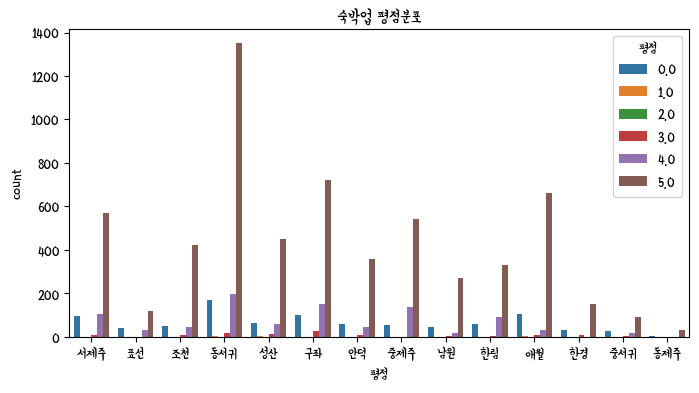

In [21]:
data["평점"].isna().sum()
data["평점"].fillna(0,inplace=True)
data["평점"].value_counts()
plt.figure()
plt.title("숙박업 평점분포")
sb.countplot(data=data,
             x="행정구역", hue="평점")
plt.xlabel("평점")
plt.show()

In [23]:
add=pd.read_excel("C:/Users/SAMSUNG/Desktop/DataAnalysis/my_projects/02_semi_project2/제주공항에서숙박.xlsx")

In [27]:
data1=data.set_index("타이틀")
data1.index.name=None
add.set_index("name",inplace=True)
add.index.name=None

In [34]:
add_data=pd.merge(data,add,how="left",left_on="타이틀",right_on=add.index).drop(columns="Unnamed: 0")
add_data1=add_data.copy()
add_data1["거리(m)"]=add_data1["거리(m)"].dropna()
temp=add_data1[add_data1["거리(m)"].isna()==False]

In [113]:
x,y=np.histogram(temp["거리(m)"],bins=13)
plt.figure()
sb.histplot(data=temp["거리(m)"],
            bins=13)
plt.xticks(y)
plt.show()

In [127]:
add_data1

,콘텐츠분류,타이틀,지번주소,도로명주소,위도_x,경도_x,탐나오연동여부,평점,소셜네트워크주소,조회수,...,등록일시,소셜네트워크공유수,인기점수,행정구역,경도_y,위도_y,taxi,toll,거리(m),이동시간(초)
0,숙박,해피펜션,제주특별자치도 제주시 외도2동 317-1,제주특별자치도 제주시 월대1길 4,33.494110,126.433780,y,0.0,blog.naver.com/happycho25,979,...,2017-04-25,0,1958.0,서제주,126.433769,33.494102,7900.0,0.0,7169.0,995.0
1,숙박,빠담빠담게스트하우스,제주특별자치도 서귀포시 표선면 표선리 2093,제주특별자치도 서귀포시 표선면 돈오름로 198-4,33.329624,126.818270,y,5.0,NaN,4263,...,2016-11-18,0,8554.0,표선,126.818263,33.329617,36400.0,0.0,43069.0,3729.0
2,숙박,빠담빠담게스트하우스,제주특별자치도 서귀포시 표선면 표선리 2093,제주특별자치도 서귀포시 표선면 돈오름로 198-4,33.329624,126.818270,y,5.0,NaN,4263,...,2016-11-18,0,8554.0,표선,126.818263,33.329617,36400.0,0.0,43069.0,3729.0
3,숙박,빠담빠담게스트하우스,제주특별자치도 서귀포시 표선면 표선리 2093,제주특별자치도 서귀포시 표선면 돈오름로 198-4,33.329624,126.818270,y,5.0,NaN,4263,...,2016-11-18,0,8554.0,표선,126.818263,33.329617,36400.0,0.0,43069.0,3729.0
4,숙박,빠담빠담게스트하우스,제주특별자치도 서귀포시 표선면 표선리 2093,제주특별자치도 서귀포시 표선면 돈오름로 198-4,33.329624,126.818270,y,5.0,NaN,4263,...,2016-11-18,0,8554.0,표선,126.818263,33.329617,36400.0,0.0,43069.0,3729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8417,숙박,유수암캠핑장,제주특별자치도 제주시 애월읍 유수암리 2994,제주특별자치도 제주시 애월읍 하소로 684-25,33.422314,126.393990,y,0.0,NaN,116,...,2022-12-15,0,232.0,애월,126.393989,33.422307,16100.0,0.0,16747.0,1927.0
8418,숙박,삭제요청 4,제주특별자치도 제주시 애월읍 하귀2리 2999-1,제주특별자치도 제주시 애월읍 번대동2길 21-3,33.476084,126.390220,y,0.0,NaN,0,...,2022-12-15,0,NaN,애월,126.390211,33.476081,11600.0,0.0,11930.0,1545.0
8419,숙박,에퀴녹스 드 협재,제주특별자치도 제주시 한림읍 협재리 1503-1,제주특별자치도 제주시 한림읍 협재10길 4,33.398581,126.246741,y,0.0,instagram.com/curinous,101,...,2022-12-15,0,202.0,한림,126.246733,33.398576,25500.0,0.0,29350.0,3163.0
8420,숙박,소노벨제주,제주특별자치도 제주시 조천읍 함덕리 274,제주특별자치도 제주시 조천읍 신북로 577,33.541286,126.671485,y,0.0,NaN,355,...,2022-12-22,0,710.0,조천,126.671481,33.541282,17200.0,0.0,19060.0,2240.0
